In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from libtiff import TIFF
import cv2

from skimage.segmentation import watershed
from skimage.feature import peak_local_max

# # Generate an initial image with two overlapping circles
# tif = TIFF.open('t100.tif',mode='r')
# image = tif.read_image()
# plt.imshow(image, cmap=plt.cm.gray)

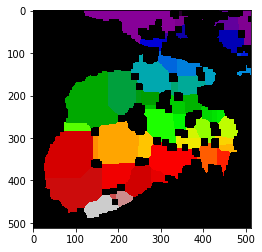

In [7]:
#image = cv2.equalizeHist(image)

sobelX = cv2.Sobel(image,cv2.CV_64F,1,0)#x方向的梯度
sobelY = cv2.Sobel(image,cv2.CV_64F,0,1)#y方向的梯度
sobelX = np.uint8(np.absolute(sobelX))#x方向梯度的绝对值
sobelY = np.uint8(np.absolute(sobelY))#y方向梯度的绝对值
image = cv2.bitwise_or(sobelX,sobelY)#

#image = cv2.bilateralFilter(image,9,75,75)
#image = cv2.imread('t001.tif',cv2.IMREAD_UNCHANGED)

ret, image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#image = cv2.medianBlur(image, 3)#t200

#kernel = np.ones((3,3), np.uint8)
#image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
#image = cv2.GaussianBlur(image,(9,9),0)
image = cv2.dilate(image, np.ones((11,11), np.uint8))
image = cv2.erode(image, np.ones((15,15), np.uint8))

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((19, 19)),
                            labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

plt.imshow(labels, cmap=plt.cm.nipy_spectral)

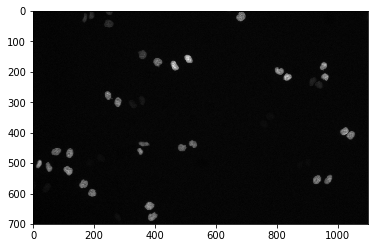

In [54]:
# Generate an initial image with two overlapping circles
tif = TIFF.open('t200.tif',mode='r')
image = tif.read_image()
plt.imshow(image, cmap=plt.cm.gray)

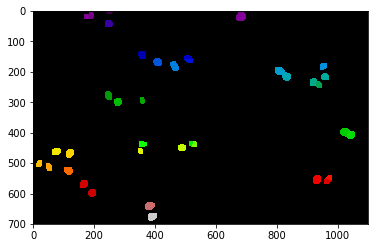

In [55]:
sobelX = cv2.Sobel(image,cv2.CV_64F,1,0)#x方向的梯度
sobelY = cv2.Sobel(image,cv2.CV_64F,0,1)#y方向的梯度
sobelX = np.uint8(np.absolute(sobelX))#x方向梯度的绝对值
sobelY = np.uint8(np.absolute(sobelY))#y方向梯度的绝对值
image = cv2.bitwise_or(sobelX,sobelY)#

#image = cv2.bilateralFilter(image,9,75,75)
#image = cv2.imread('t001.tif',cv2.IMREAD_UNCHANGED)

ret, image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
image = cv2.medianBlur(image, 9)#t200

#kernel = np.ones((3,3), np.uint8)
#image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
#image = cv2.GaussianBlur(image,(9,9),0)
image = cv2.dilate(image, np.ones((3,3), np.uint8))
image = cv2.erode(image, np.ones((19,19), np.uint8))
image = cv2.dilate(image, np.ones((13,13), np.uint8))

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((9, 9)),
                            labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

plt.imshow(labels, cmap=plt.cm.nipy_spectral)

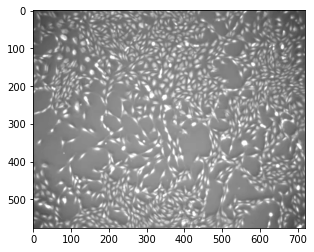

In [37]:
# Generate an initial image with two overlapping circles
import os 
os.chdir("/Users/minruilu/Desktop/OneDrive - UNSW/UNSW/2020 Semester 2/comp9517/project/COMP9517 20T2 Group Project Image Sequences/PhC-C2DL-PSC/Sequence 2")
tif = TIFF.open('t425.tif',mode='r')
image = tif.read_image()
plt.imshow(image, cmap=plt.cm.gray)

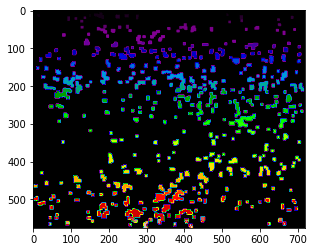

In [43]:
tif = TIFF.open('t425.tif',mode='r')
image = tif.read_image()

sobelX = cv2.Sobel(image,cv2.CV_64F,1,0)#x方向的梯度
sobelY = cv2.Sobel(image,cv2.CV_64F,0,1)#y方向的梯度
sobelX = np.uint8(np.absolute(sobelX))#x方向梯度的绝对值
sobelY = np.uint8(np.absolute(sobelY))#y方向梯度的绝对值
image = cv2.bitwise_or(sobelX,sobelY)#

#image = cv2.bilateralFilter(image,9,75,75)
#image = cv2.imread('t001.tif',cv2.IMREAD_UNCHANGED)

ret, image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
image = cv2.medianBlur(image,1)

#kernel = np.ones((3,3), np.uint8)
#image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
#image = cv2.GaussianBlur(image,(9,9),0)
# image = cv2.dilate(image, np.ones((11,11), np.uint8))
image = cv2.dilate(image, np.ones((3,3), np.uint8))
image = cv2.erode(image, np.ones((11,11), np.uint8))
image = cv2.dilate(image, np.ones((7,7), np.uint8))

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((13, 13)),
                            labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

plt.imshow(labels, cmap=plt.cm.nipy_spectral)